# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : normale 

In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Video

In [2]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.01     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity ( ~ resin)
resolution = 500
len_scale = 25

sxy = b + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions
boudary_layer = mp.PML(pml)

# The geometry of the cavity
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 0.8                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 20                      # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    symmetries=[mp.Mirror(mp.X), mp.Mirror(mp.Y)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00112605 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.135855 s
-----------


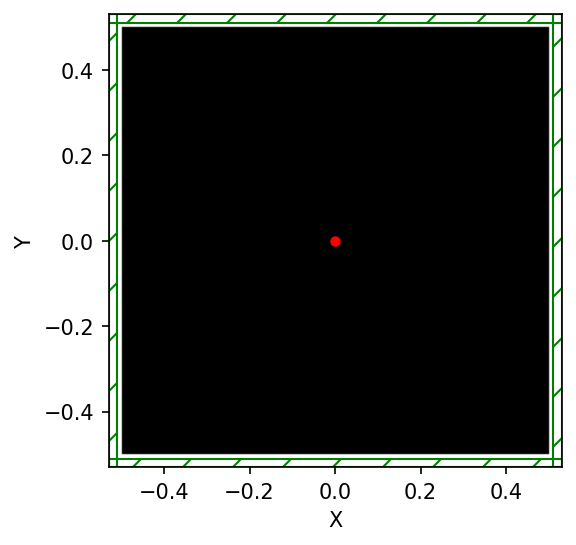

In [3]:
# visualize the cavité
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [4]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Ez
h1 = mp.Harminv(mp.Ez, mp.Vector3(0,0), fcen, df)   

sim.run(mp.after_sources(h1),
        until_after_sources=600)

FloatProgress(value=0.0, description='0% done ', max=600.5)

Meep progress: 14.818/600.5 = 2.5% done in 4.0s, 158.1s to go
on time step 14838 (time=14.838), 0.000269582 s/step
Meep progress: 30.041/600.5 = 5.0% done in 8.0s, 151.9s to go
on time step 30062 (time=30.062), 0.000262749 s/step
Meep progress: 44.978/600.5 = 7.5% done in 12.0s, 148.2s to go
on time step 45003 (time=45.003), 0.000267724 s/step
Meep progress: 59.911/600.5 = 10.0% done in 16.0s, 144.4s to go
on time step 59937 (time=59.937), 0.000267851 s/step
Meep progress: 75.07000000000001/600.5 = 12.5% done in 20.0s, 140.0s to go
on time step 75099 (time=75.099), 0.000263825 s/step
Meep progress: 90.324/600.5 = 15.0% done in 24.0s, 135.6s to go
on time step 90355 (time=90.355), 0.000262202 s/step
Meep progress: 105.495/600.5 = 17.6% done in 28.0s, 131.4s to go
on time step 105527 (time=105.527), 0.000263647 s/step
Meep progress: 120.528/600.5 = 20.1% done in 32.0s, 127.4s to go
on time step 120563 (time=120.563), 0.000266032 s/step
Meep progress: 135.585/600.5 = 22.6% done in 36.0s, 

In [5]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hx
h2 = mp.Harminv(mp.Hx, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h2),
        until_after_sources=600)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00134087 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.142088 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.5)

Meep progress: 17.833000000000002/600.5 = 3.0% done in 4.0s, 130.7s to go
on time step 17857 (time=17.857), 0.000224013 s/step
Meep progress: 35.804/600.5 = 6.0% done in 8.0s, 126.2s to go
on time step 35830 (time=35.83), 0.000222559 s/step
Meep progress: 53.800000000000004/600.5 = 9.0% done in 12.0s, 121.9s to go
on time step 53829 (time=53.829), 0.00022224 s/step
Meep progress: 71.894/600.5 = 12.0% done in 16.0s, 117.6s to go
on time step 71927 (time=71.927), 0.000221022 s/step
Meep progress: 89.93900000000001/600.5 = 15.0% done in 20.0s, 113.5s to go
on time step 89974 (time=89.974), 0.00022165 s/step
Meep progress: 108.044/600.5 = 18.0% done in 24.0s, 109.4s to go
on time step 108082 (time=108.082), 0.000220907 s/step
Meep progress: 126.08/600.5 = 21.0% done in 28.0s, 105.4s to go
on time step 126120 (time=126.12), 0.000221762 s/step
Meep progress: 144.144/600.5 = 24.0% done in 32.0s, 101.3s to go
on time step 144185 (time=144.185), 0.000221426 s/step
Meep progress: 162.24/600.5 = 

In [6]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hy
h3 = mp.Harminv(mp.Hy, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h3),
        until_after_sources=600)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00137091 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.143012 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.5)

Meep progress: 18.343/600.5 = 3.1% done in 4.0s, 127.0s to go
on time step 18370 (time=18.37), 0.000217756 s/step
Meep progress: 36.029/600.5 = 6.0% done in 8.0s, 125.3s to go
on time step 36059 (time=36.059), 0.000226133 s/step
Meep progress: 53.709/600.5 = 8.9% done in 12.0s, 122.2s to go
on time step 53740 (time=53.74), 0.000226234 s/step
Meep progress: 71.422/600.5 = 11.9% done in 16.0s, 118.5s to go
on time step 71456 (time=71.456), 0.000225785 s/step
Meep progress: 89.114/600.5 = 14.8% done in 20.0s, 114.8s to go
on time step 89129 (time=89.129), 0.000226389 s/step
Meep progress: 106.441/600.5 = 17.7% done in 24.0s, 111.4s to go
on time step 106486 (time=106.486), 0.000230459 s/step
Meep progress: 124.254/600.5 = 20.7% done in 28.0s, 107.3s to go
on time step 124300 (time=124.3), 0.000224543 s/step
Meep progress: 142.014/600.5 = 23.6% done in 32.0s, 103.3s to go
on time step 142060 (time=142.06), 0.000225229 s/step
Meep progress: 159.778/600.5 = 26.6% done in 36.0s, 99.3s to go
o

## Observation : Il n'y a aucun mode avec la recherche da la composant Hy

In [11]:
mode_Ez = np.array(h1.modes)
mode_Hx = np.array(h2.modes)
res_modes = np.vstack((mode_Ez, mode_Hx))
print(np.shape(res_modes))

(200, 5)


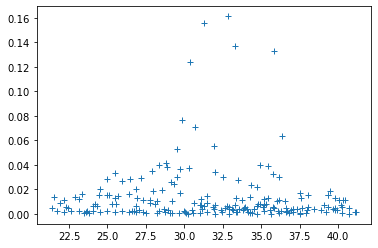

In [8]:
plt.plot(np.abs(res_modes[:,0]), np.abs(res_modes[:,1]), '+')

In [9]:
sim.reset_meep()
fcen=np.abs(res_modes[0][0])
df = 0.01
sim.sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))]

# Start the simulation and get into steady state
sim.run(until=600) 

# Prepare the animator and record the steady state response
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(1/fcen/20, Animate),until=1/fcen)

# Close the animator's working frame
plt.close()

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.0017488 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.139634 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.0)

Meep progress: 17.024/600.0 = 2.8% done in 4.0s, 137.0s to go
on time step 17052 (time=17.052), 0.000234583 s/step
Meep progress: 34.268/600.0 = 5.7% done in 8.0s, 132.1s to go
on time step 34298 (time=34.298), 0.000231947 s/step
Meep progress: 51.142/600.0 = 8.5% done in 12.0s, 128.8s to go
on time step 51173 (time=51.173), 0.000237041 s/step
Meep progress: 69.611/600.0 = 11.6% done in 16.0s, 121.9s to go
on time step 69639 (time=69.639), 0.000216627 s/step
Meep progress: 87.013/600.0 = 14.5% done in 20.0s, 117.9s to go
on time step 87050 (time=87.05), 0.000229744 s/step
Meep progress: 104.46900000000001/600.0 = 17.4% done in 24.0s, 113.8s to go
on time step 104508 (time=104.508), 0.000229125 s/step
Meep progress: 121.955/600.0 = 20.3% done in 28.0s, 109.8s to go
on time step 121997 (time=121.997), 0.000228718 s/step
Meep progress: 139.463/600.0 = 23.2% done in 32.0s, 105.7s to go
on time step 139506 (time=139.506), 0.000228464 s/step
Meep progress: 156.84/600.0 = 26.1% done in 36.0s,

FloatProgress(value=600.0, description='0% done ', max=600.0460217798436, min=600.0)

Normalizing field data...
run 4 finished at t = 600.047 (600047 timesteps)


In [10]:
# Process the animation and view it
filename = "carre_symetrie1.mp4"
Animate.to_mp4(5,filename)
Video(filename)

Generating MP4...
